# Como Usar o Histograma para *Data Science*

![Data Science, Python e matplotlib](http://sigmoidal.ai/wp-content/uploads/2019/07/maxresdefault-1-1.jpg)


**[Veja o artigo deste notebook no blog sigmoidal.ai](http://sigmoidal.ai/2-tipos-de-graficos-importantes-data-science)**

---

A visualização de dados é uma parte fundamental do **Data Science**, e deve estar presente no kit de qualquer cientista de dados que esteja querendo tirar *insights* valiosos de seus bits.

Um data scientist pode usar gráficos basicamente para duas finalidades distintas:

* Para explorar os dados durante a fase da Análise Exploratória; e
* Para comunicar os resultados aos stakeholders e decisores (*decision-makers*).

Mais do que saber construir modelos de **Machine Learning** e extrair previsões a partir de dados passados, você precisa construir cada vez mais sua habilidade de produzir visualizações úteis e que melhorem a qualidade do seu projeto.

**Saber qual tipo de gráfico usar para cada situação vai fazer muita diferença**, testar as hipóteses levantadas e transmitir aos outros aquilo que você descobriu.

Hoje vou trazer um dos principais gráficos usados em todas as fases de uma Análise de Dados, o **HISTOGRAMA**!

Para ver como usar esses tipo de gráfico, vou aplicar ele na pesquisa anual de desenvolvedores do Stack Overflow com os resultados de 2018.

***Para ver o artigo completo, [acesse o blog](http://sigmoidal.ai/2-tipos-de-graficos-importantes-data-science)***

## Notebook do Artigo

Segue o código para você acompanhar com o artigo completo da [sigmoidal.ai](http://sigmoidal.ai)

### Download do dataset da Stack Overflow

In [1]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os

# confugurações do notebook
pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# URL com os dados da survey do Stack Overflow
DATA_URL = "https://s3.amazonaws.com/video.udacity-data.com/topher/2018/February/5a8cb654_survey-results-public/survey-results-public.csv"

def get_survey_data(data_url=DATA_URL):
    """
    Baixa os dados da survey do Stack Overflow.
    
    Parâmetros:
        data_url <string>: Endereço do arquivo csv com a survey do Stack Overflow
        
    Retorna:
        None
    """
    csv_file = data_url.split(os.sep)[-1]
    
    if not os.path.isfile(csv_file):
        urllib.request.urlretrieve(DATA_URL, 'survey-results-public.csv')
        print("[+] Arquivo baixado...")
        
    else:
        print("[+] O arquivo '{}' já existe na pasta...".format(csv_file))
        
# baixar os dados do Stack Overflow
get_survey_data()

[+] O arquivo 'survey-results-public.csv' já existe na pasta...


### Análise do DataFrame

In [4]:
# importar os dados do arquivo csv para um DataFrame no Pandas
df = pd.read_csv('survey-results-public.csv')

# ver a quantidade de entradas do arquivo
print("{} colunas e {} linhas de entrada.".format(df.shape[1], df.shape[0]))

154 colunas e 51392 linhas de entrada.


In [5]:
# verificar as primeiras entradas do DataFrame
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

### Histograma

Resumidamente, um histograma é um gráfico de distribuição de frequência, e que permite analisar visualmente como uma amostra/população está distribuída.

Como nosso cérebro humano tem dificuldade de processar grandes volumes de dadoss, uma das melhores abordagens quando você pega um dataset qualquer é plotar a distribuição das variáveis numéricas a fim de criar um conhecimento inicial.

Sem saber nada sobre a variável 'Salary', veja como só olhar o histograma facilita o trabalho.

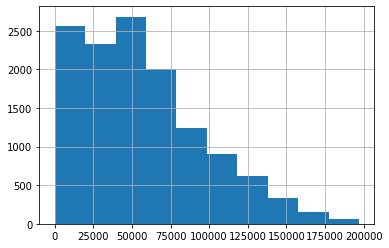

In [6]:
# plotar o histograma do Salário dos desenvolvedores
df['Salary'].hist();

Como você viu aí em cima, para plotar o histograma de qualquer variável basta selecionar ela dentro do DataFrame e chamar o método `hist()` e ver seu gráfico aparecer na tela.

Só olhando o gráfico acima ja podemos inferir que há uma maior frequência de salário na faixa dos $50 mil dólares entre todos os desenvolvedores que responderam ao questionário.

Também vemos que o gráfico não é simétrico, pois a maior parte dos desenvolvedores tem seus salários concentrados na esquerda do gráfico. Isso significa que um desenvolvedor médio pode esperar seu salário entre 25 mil e 60 mil dólares aproximadamente.

Também é fácil ver que muitos poucos desenvolvedores tem salários acima de 100 mil Trumps.